# Heatmaps & Correlation Matrices in Python
A comprehensive guide to visualizing data patterns, relationships, and anomalies using heatmaps and correlation matrices.
What are Heatmaps?
Heatmaps use color to represent values in a matrix or grid format, making patterns immediately visible. They're essential for:

Visualizing correlation matrices between variables
Showing patterns over two dimensions (time vs category, etc.)
Identifying clusters and outliers
Revealing missing data patterns

Key Insight: Color intensity reveals magnitude - hot colors (red) for high values, cool colors (blue) for low values.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

# Set random seed for reproducibility
np.random.seed(42)

# Set style
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10, 8)

# Generate correlated cost data
np.random.seed(42)
n = 500

# Base cost with correlations
base_cost = np.random.normal(100000, 20000, n)

df = pd.DataFrame({
    'labor_cost': base_cost * 0.5 + np.random.normal(0, 5000, n),
    'material_cost': base_cost * 0.3 + np.random.normal(0, 3000, n),
    'overhead': base_cost * 0.15 + np.random.normal(0, 2000, n),
    'shipping': np.random.normal(5000, 1000, n),
    'utilities': np.random.normal(3000, 500, n),
    'equipment': base_cost * 0.1 + np.random.normal(0, 1500, n),
    'maintenance': np.random.normal(2000, 400, n)
})

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (500, 7)

First few rows:
     labor_cost  material_cost      overhead     shipping    utilities  \
0  59598.029268   37178.351228  18046.864611  4324.821725  3285.306499   
1  58164.440191   31944.315242  13482.835664  4855.481329  3484.092330   
2  49484.047512   34065.022338  15306.667847  4207.580079  2834.345808   
3  68045.144748   37197.368805  19562.340654  4692.038470  2693.881633   
4  44405.253407   30689.749693  13957.170631  3106.385333  2457.424737   

      equipment  maintenance  
0   8131.716969  2472.256365  
1   8432.893881  1749.074622  
2  10674.968776  2018.089084  
3  15877.591199  2020.479161  
4  10366.522937  1799.286323  


2. Basic Correlation Matrix


In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               labor_cost  material_cost  overhead  shipping  utilities  \
labor_cost       1.000000       0.800647  0.744305  0.004275   0.052696   
material_cost    0.800647       1.000000  0.739743 -0.027895   0.034281   
overhead         0.744305       0.739743  1.000000 -0.054072   0.037331   
shipping         0.004275      -0.027895 -0.054072  1.000000  -0.022495   
utilities        0.052696       0.034281  0.037331 -0.022495   1.000000   
equipment        0.705576       0.678773  0.657477  0.016557  -0.011485   
maintenance     -0.020981      -0.045358 -0.020828  0.059223   0.006277   

               equipment  maintenance  
labor_cost      0.705576    -0.020981  
material_cost   0.678773    -0.045358  
overhead        0.657477    -0.020828  
shipping        0.016557     0.059223  
utilities      -0.011485     0.006277  
equipment       1.000000    -0.032208  
maintenance    -0.032208     1.000000  


# Interpreting values:

- 1.0: Perfect positive correlation
- 0.0: No correlation
- -1.0: Perfect negative correlation
- |r| > 0.7: Strong correlation
- 0.3 < |r| < 0.7: Moderate correlation
- |r| < 0.3: Weak correlation

# 3. Basic Correlation Heatmap with Seaborn

What to look for:

- Red cells: Strong positive correlation
- Blue cells: Strong negative correlation
- White cells: No correlation
- Diagonal: Always 1.0 (variable with itself)

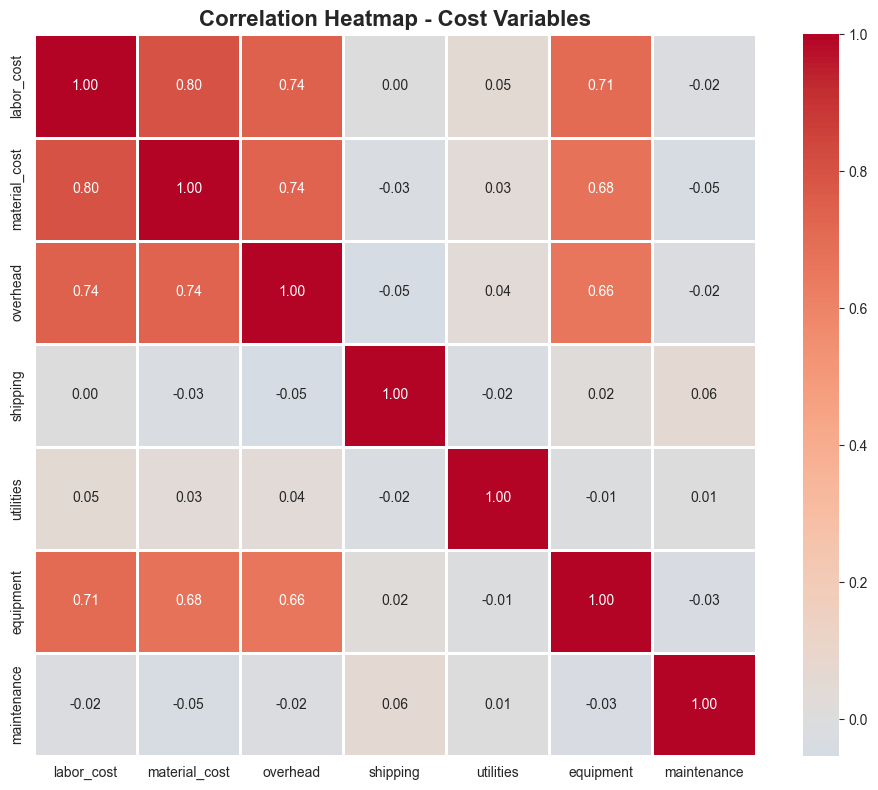

In [16]:
# Basic heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Cost Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


#  Customized Correlation Heatmap

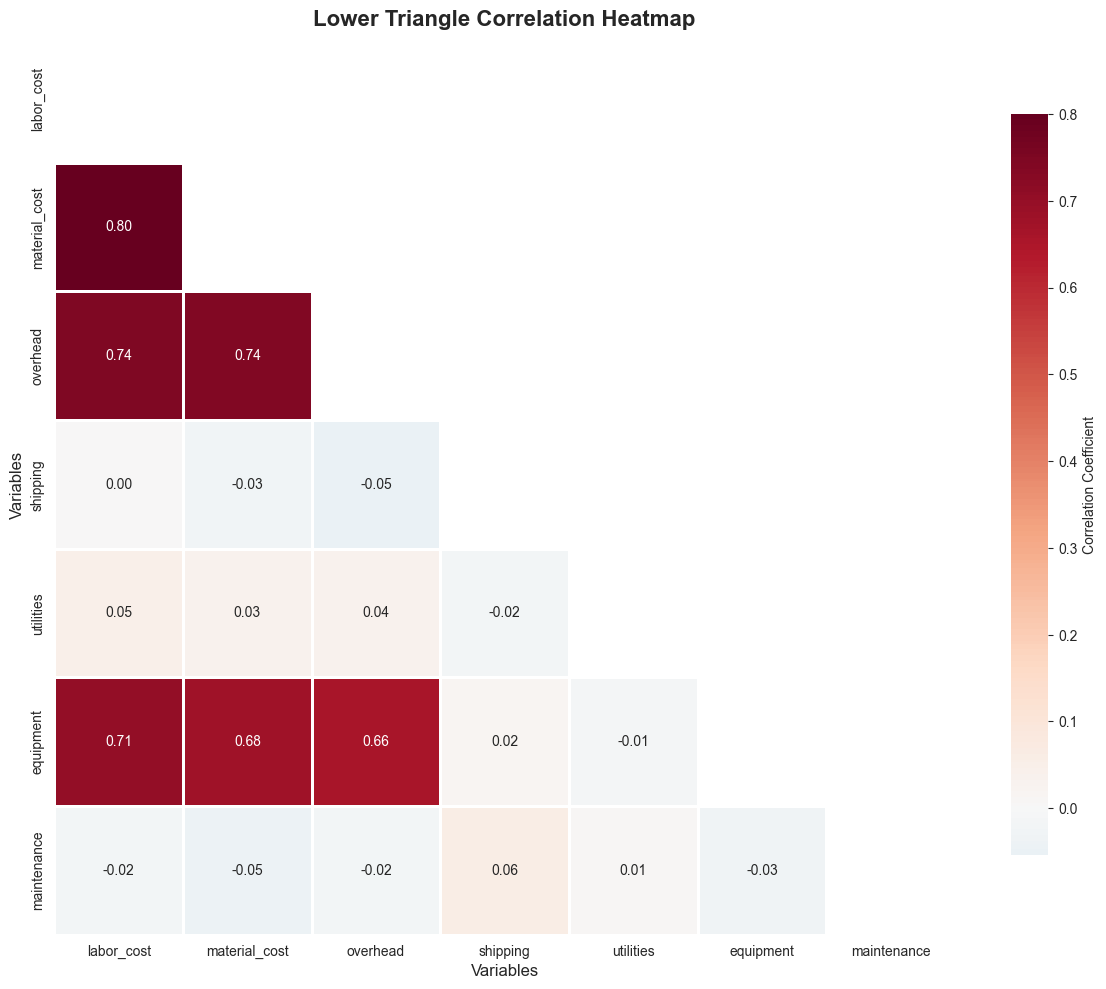

In [17]:
# More customization
plt.figure(figsize=(12, 10))

# Create mask for upper triangle (avoid redundancy)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot with custom settings
sns.heatmap(
    correlation_matrix,
    mask=mask,              # Hide upper triangle
    annot=True,             # Show correlation values
    fmt='.2f',              # 2 decimal places
    cmap='RdBu_r',          # Red-Blue reversed colormap
    center=0,               # Center colormap at 0
    square=True,            # Square cells
    linewidths=2,           # Cell borders
    cbar_kws={
        'label': 'Correlation Coefficient',
        'shrink': 0.8
    }
)

plt.title('Lower Triangle Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.tight_layout()
plt.show()

# Finding Strong Correlations

In [18]:
# Find and highlight strong correlations
def find_strong_correlations(corr_matrix, threshold=0.7):
    """
    Find pairs with correlation above threshold
    """
    # Get upper triangle to avoid duplicates
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                strong_correlations.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlation': corr_value
                })

    return pd.DataFrame(strong_correlations).sort_values('Correlation',
                                                         key=abs,
                                                         ascending=False)

# Find strong correlations
strong_corr = find_strong_correlations(correlation_matrix, threshold=0.7)

print("Strong Correlations (|r| > 0.7):")
print("=" * 60)
if len(strong_corr) > 0:
    print(strong_corr.to_string(index=False))
else:
    print("No strong correlations found")

Strong Correlations (|r| > 0.7):
   Variable 1    Variable 2  Correlation
   labor_cost material_cost     0.800647
   labor_cost      overhead     0.744305
material_cost      overhead     0.739743
   labor_cost     equipment     0.705576


# Heatmap with Different Color Schemes
## Colormap guide:

- Diverging (coolwarm, RdBu): Best for correlations (positive/negative)
- Sequential (viridis, plasma): Best for magnitudes (only positive values)

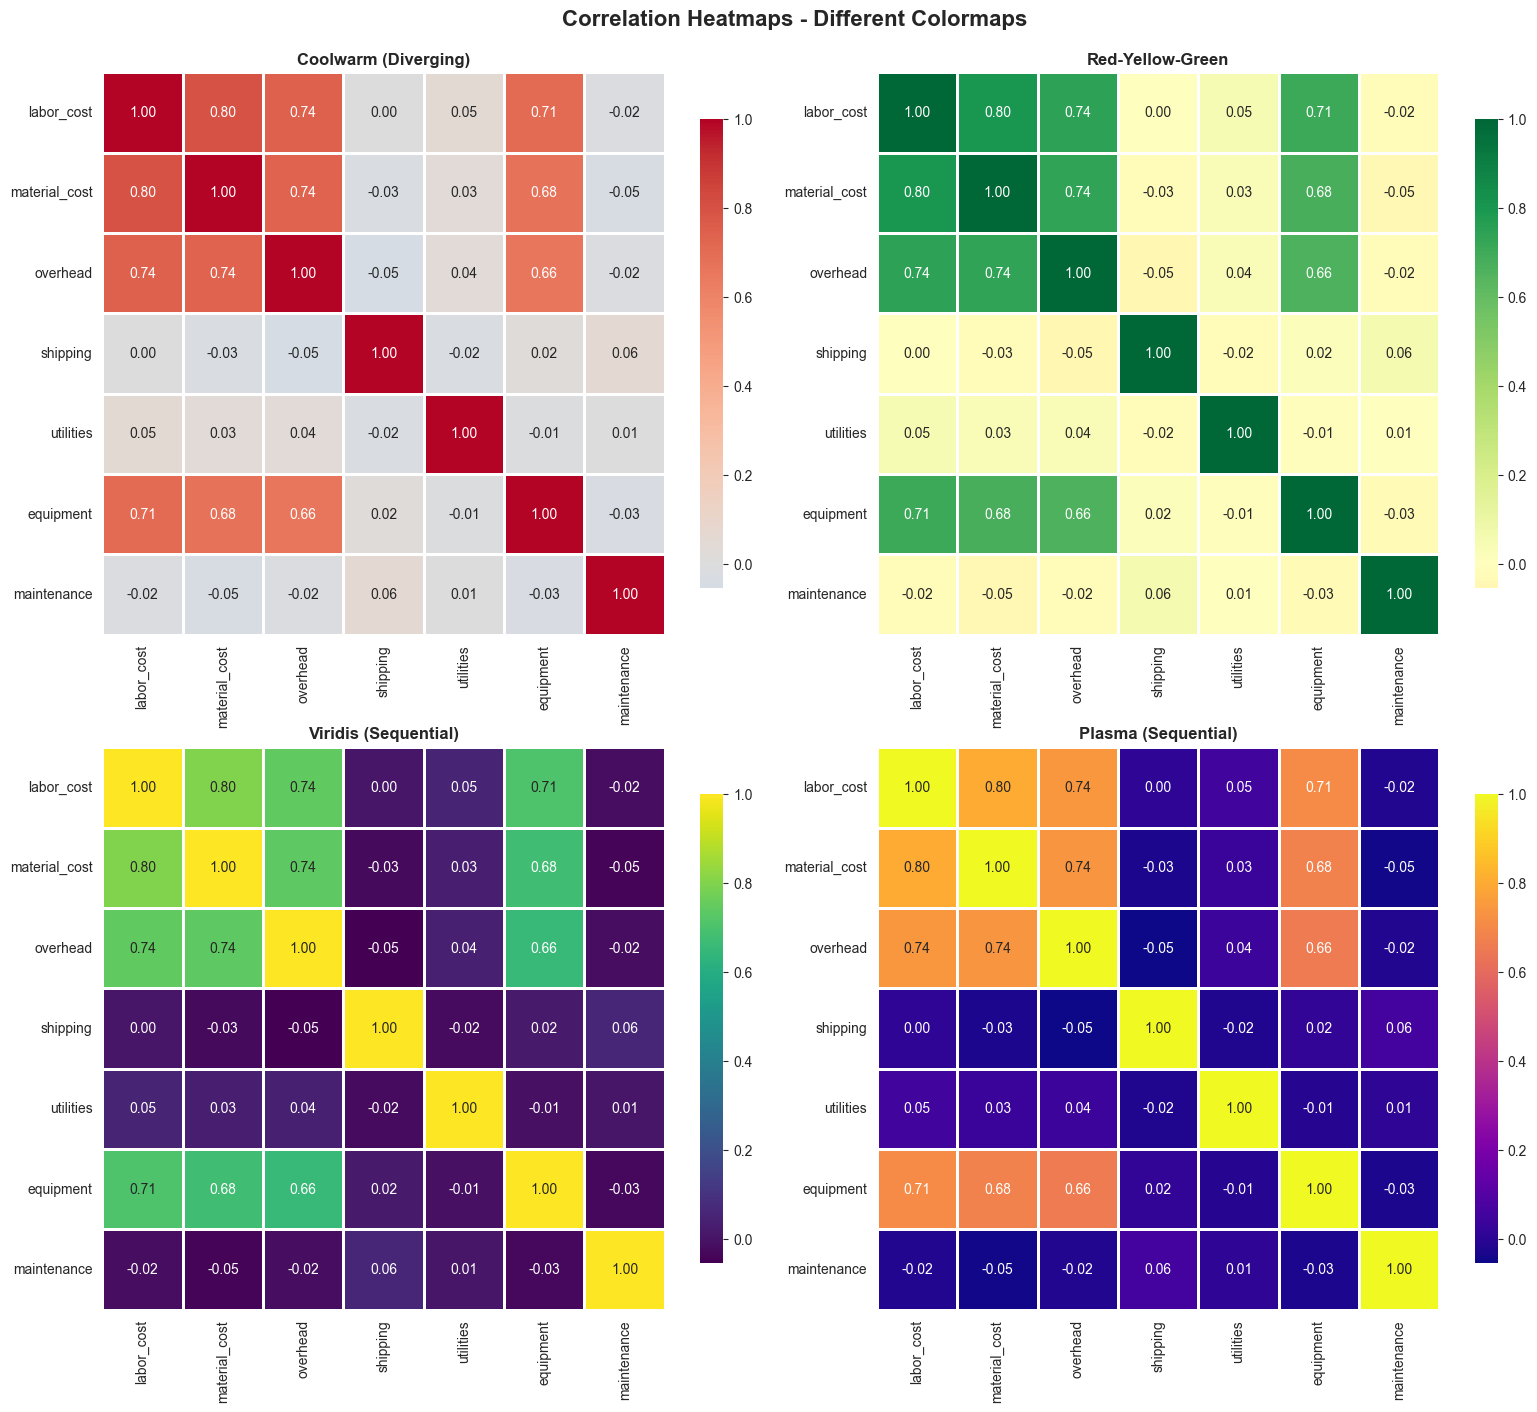

In [19]:
# Compare different colormaps
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

colormaps = ['coolwarm', 'RdYlGn', 'viridis', 'plasma']
titles = ['Coolwarm (Diverging)', 'Red-Yellow-Green', 'Viridis (Sequential)', 'Plasma (Sequential)']

for ax, cmap, title in zip(axes.flat, colormaps, titles):
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap=cmap,
        center=0 if cmap in ['coolwarm', 'RdYlGn'] else None,
        square=True,
        linewidths=1,
        ax=ax,
        cbar_kws={'shrink': 0.8}
    )
    ax.set_title(title, fontsize=12, fontweight='bold')

plt.suptitle('Correlation Heatmaps - Different Colormaps', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Clustered Correlation Heatmap
## Benefits of clustering:

- Groups similar variables together
- Reveals structure in the data
- Makes patterns more obvious

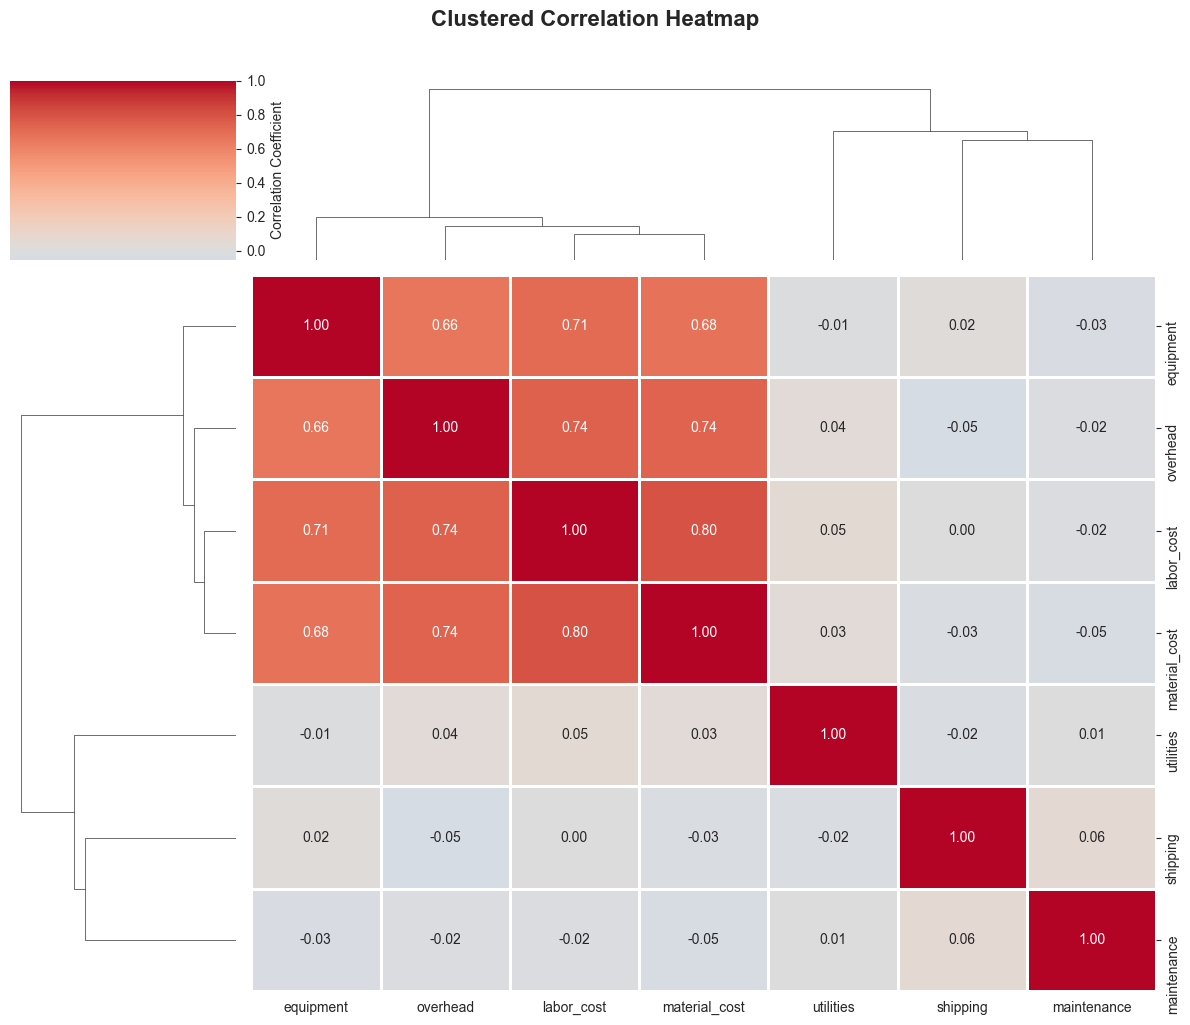

Variable clustering order:
[5, 2, 0, 1, 4, 3, 6]

Reordered variables:
['equipment', 'overhead', 'labor_cost', 'material_cost', 'utilities', 'shipping', 'maintenance']


In [20]:
# Cluster variables by similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Convert correlation to distance
distances = 1 - np.abs(correlation_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(squareform(distances), method='average')

# Create clustermap
g = sns.clustermap(
    correlation_matrix,
    method='average',
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    linewidths=1,
    figsize=(12, 10),
    cbar_kws={'label': 'Correlation Coefficient'}
)

g.fig.suptitle('Clustered Correlation Heatmap', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Variable clustering order:")
print(g.dendrogram_col.reordered_ind)
print("\nReordered variables:")
print([correlation_matrix.columns[i] for i in g.dendrogram_col.reordered_ind])

# Annotated Heatmap with Significance

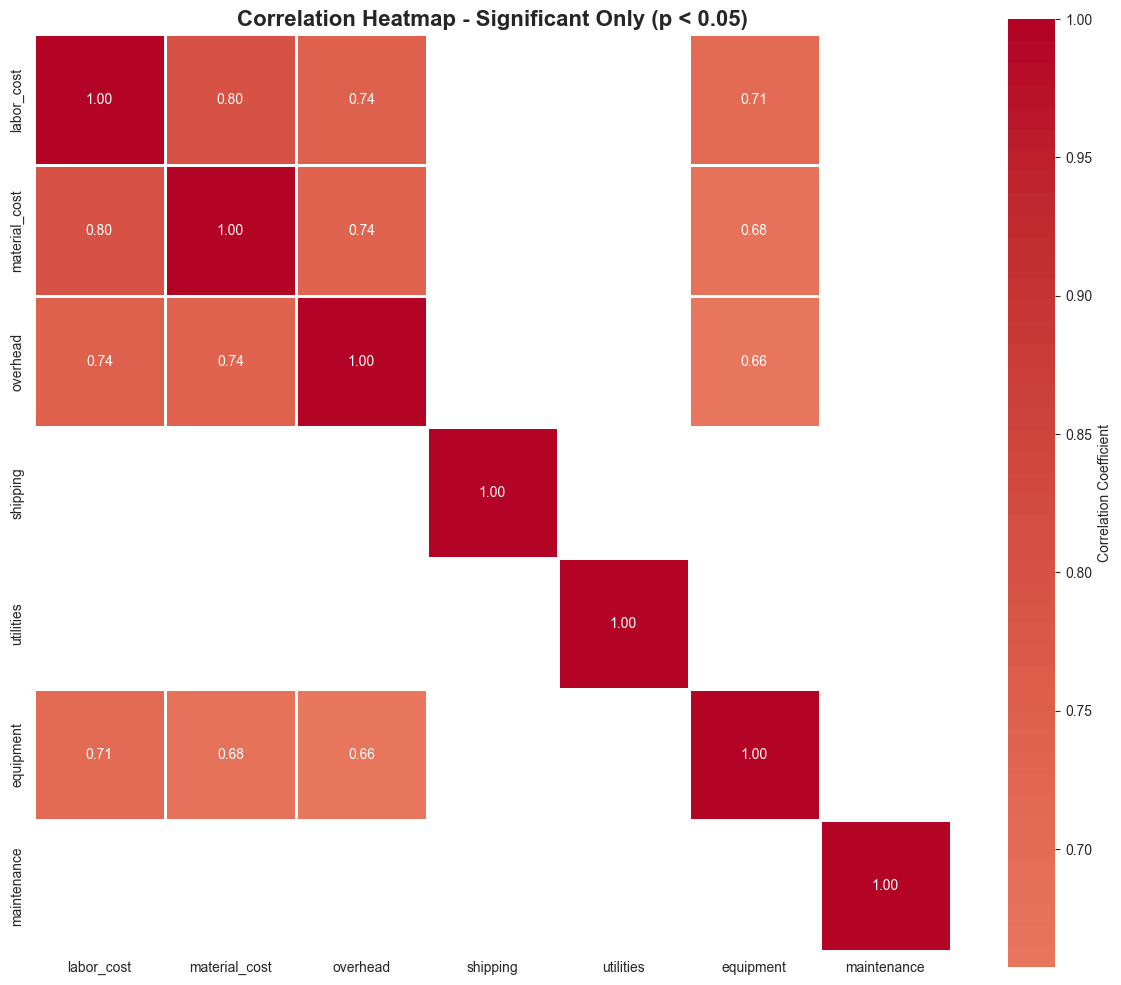

Non-significant correlations are hidden


In [21]:
from scipy.stats import pearsonr

# Calculate p-values for correlations
def calculate_pvalues(df):
    """Calculate p-values for all pairwise correlations"""
    cols = df.columns
    pvalues = pd.DataFrame(np.zeros((len(cols), len(cols))),
                          columns=cols, index=cols)

    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i != j:
                _, p = pearsonr(df[col1], df[col2])
                pvalues.iloc[i, j] = p
            else:
                pvalues.iloc[i, j] = 0

    return pvalues

# Calculate p-values
pvalues = calculate_pvalues(df)

# Create mask for non-significant correlations (p > 0.05)
sig_mask = pvalues > 0.05

# Plot with significance
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=2,
    mask=sig_mask,  # Mask non-significant
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap - Significant Only (p < 0.05)',
         fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Non-significant correlations are hidden")

# Spearman Correlation (Non-Linear Relationships)

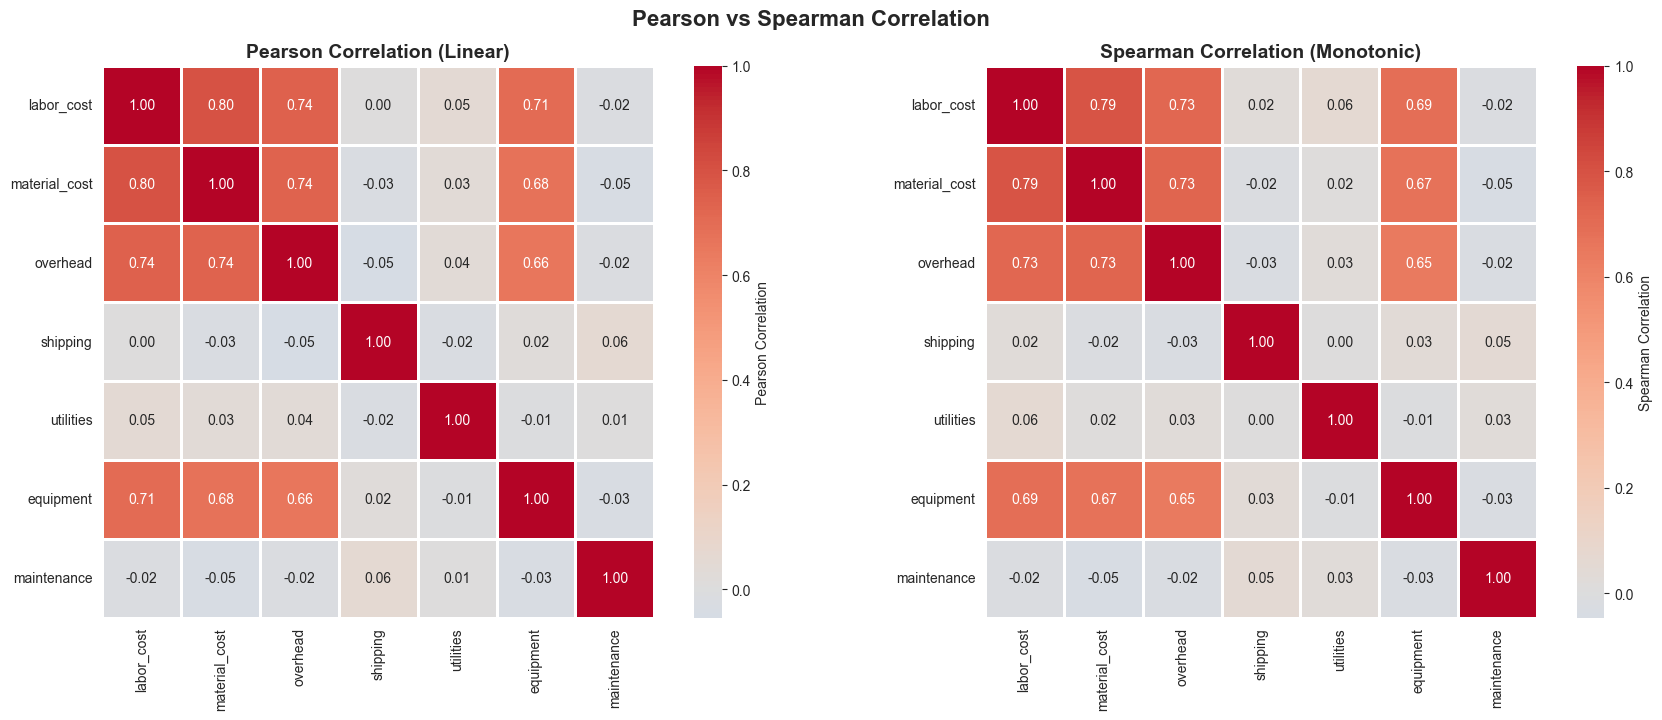

In [22]:
# Compare Pearson vs Spearman correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Pearson (linear relationships)
pearson_corr = df.corr(method='pearson')
sns.heatmap(
    pearson_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    ax=ax1,
    cbar_kws={'label': 'Pearson Correlation'}
)
ax1.set_title('Pearson Correlation (Linear)', fontsize=14, fontweight='bold')

# Spearman (monotonic relationships)
spearman_corr = df.corr(method='spearman')
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    ax=ax2,
    cbar_kws={'label': 'Spearman Correlation'}
)
ax2.set_title('Spearman Correlation (Monotonic)', fontsize=14, fontweight='bold')

plt.suptitle('Pearson vs Spearman Correlation', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Time Series Heatmap

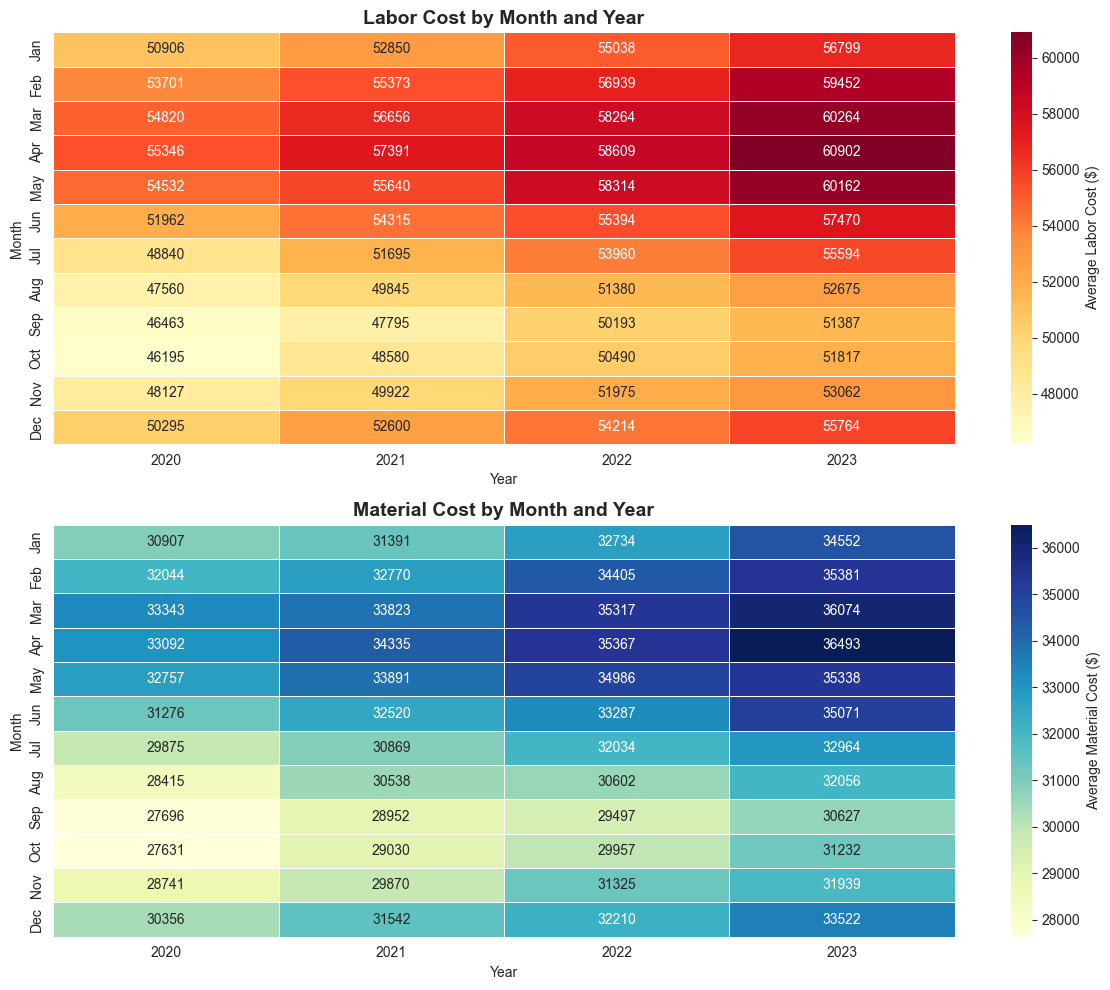

In [23]:
import pandas as pd
# Generate time series cost data
dates = pd.date_range(start='2020-01-01', periods=365*4, freq='D')
n_days = len(dates)

# Simulate daily costs with trends and seasonality
df_time = pd.DataFrame({
    'date': dates,
    'labor_cost': 50000 + np.arange(n_days)*5 + \
                  5000*np.sin(2*np.pi*np.arange(n_days)/365) + \
                  np.random.normal(0, 2000, n_days),
    'material_cost': 30000 + np.arange(n_days)*3 + \
                     3000*np.sin(2*np.pi*np.arange(n_days)/365) + \
                     np.random.normal(0, 1500, n_days)
})

# Extract year and month
df_time['year'] = df_time['date'].dt.year
df_time['month'] = df_time['date'].dt.month

# Aggregate by year-month
monthly_avg = df_time.groupby(['year', 'month']).agg({
    'labor_cost': 'mean',
    'material_cost': 'mean'
}).reset_index()

# Pivot for heatmap
pivot_labor = monthly_avg.pivot(index='month', columns='year', values='labor_cost')
pivot_material = monthly_avg.pivot(index='month', columns='year', values='material_cost')

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Labor cost heatmap
sns.heatmap(
    pivot_labor,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    linewidths=0.5,
    ax=ax1,
    cbar_kws={'label': 'Average Labor Cost ($)'}
)
ax1.set_title('Labor Cost by Month and Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Month')
ax1.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Material cost heatmap
sns.heatmap(
    pivot_material,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=0.5,
    ax=ax2,
    cbar_kws={'label': 'Average Material Cost ($)'}
)
ax2.set_title('Material Cost by Month and Year', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Month')
ax2.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

# Missing Data Heatmap

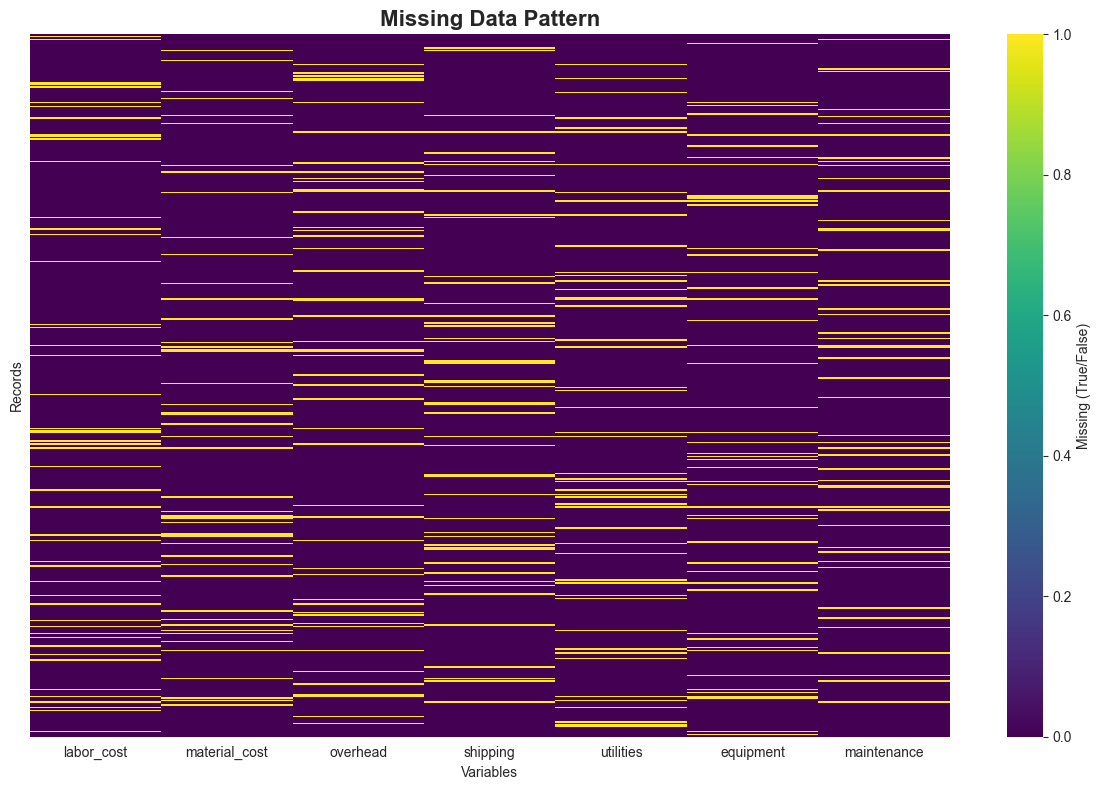

Missing Data Summary:
               Missing_Count  Missing_Percent
labor_cost                50             10.0
material_cost             50             10.0
overhead                  50             10.0
shipping                  50             10.0
utilities                 50             10.0
equipment                 50             10.0
maintenance               50             10.0


In [24]:
# Create dataset with missing values
df_missing = df.copy()

# Randomly introduce missing values
for col in df_missing.columns:
    missing_idx = np.random.choice(df_missing.index, size=int(len(df_missing)*0.1), replace=False)
    df_missing.loc[missing_idx, col] = np.nan

# Visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_missing.isnull(),
    cbar=True,
    yticklabels=False,
    cmap='viridis',
    cbar_kws={'label': 'Missing (True/False)'}
)
plt.title('Missing Data Pattern', fontsize=16, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Records')
plt.tight_layout()
plt.show()

# Summary
print("Missing Data Summary:")
print("=" * 50)
missing_counts = df_missing.isnull().sum()
missing_pct = (missing_counts / len(df_missing)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_pct
})
print(missing_summary[missing_summary['Missing_Count'] > 0])

# Anomaly Score Heatmap

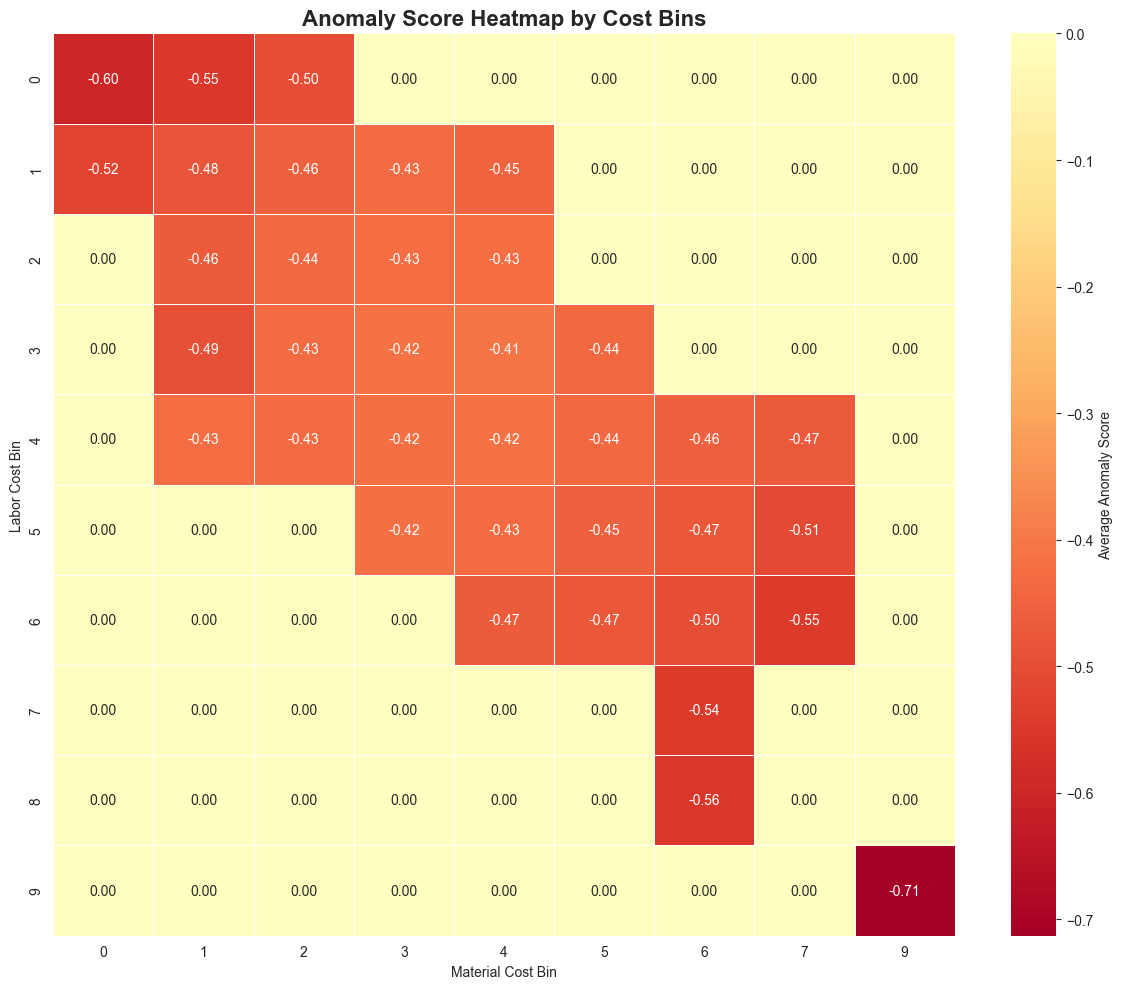

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

# Detect anomalies
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X_scaled)
df['anomaly_score_value'] = iso_forest.score_samples(X_scaled)

# Create grid for heatmap (e.g., by two key variables)
# Bin the data
df['labor_bin'] = pd.cut(df['labor_cost'], bins=10, labels=False)
df['material_bin'] = pd.cut(df['material_cost'], bins=10, labels=False)

# Aggregate anomaly scores
anomaly_grid = df.groupby(['labor_bin', 'material_bin'])['anomaly_score_value'].mean()
anomaly_pivot = anomaly_grid.unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    anomaly_pivot,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Average Anomaly Score'}
)
plt.title('Anomaly Score Heatmap by Cost Bins', fontsize=16, fontweight='bold')
plt.xlabel('Material Cost Bin')
plt.ylabel('Labor Cost Bin')
plt.tight_layout()
plt.show()

Interactive Heatmap with Plotly

In [26]:
import plotly.graph_objects as go
import plotly.express as px

# Interactive correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    colorbar=dict(title='Correlation')
))

fig.update_layout(
    title='Interactive Correlation Heatmap',
    xaxis_title='Variables',
    yaxis_title='Variables',
    height=700,
    width=800
)

fig.show()

Correlation with Target Variable

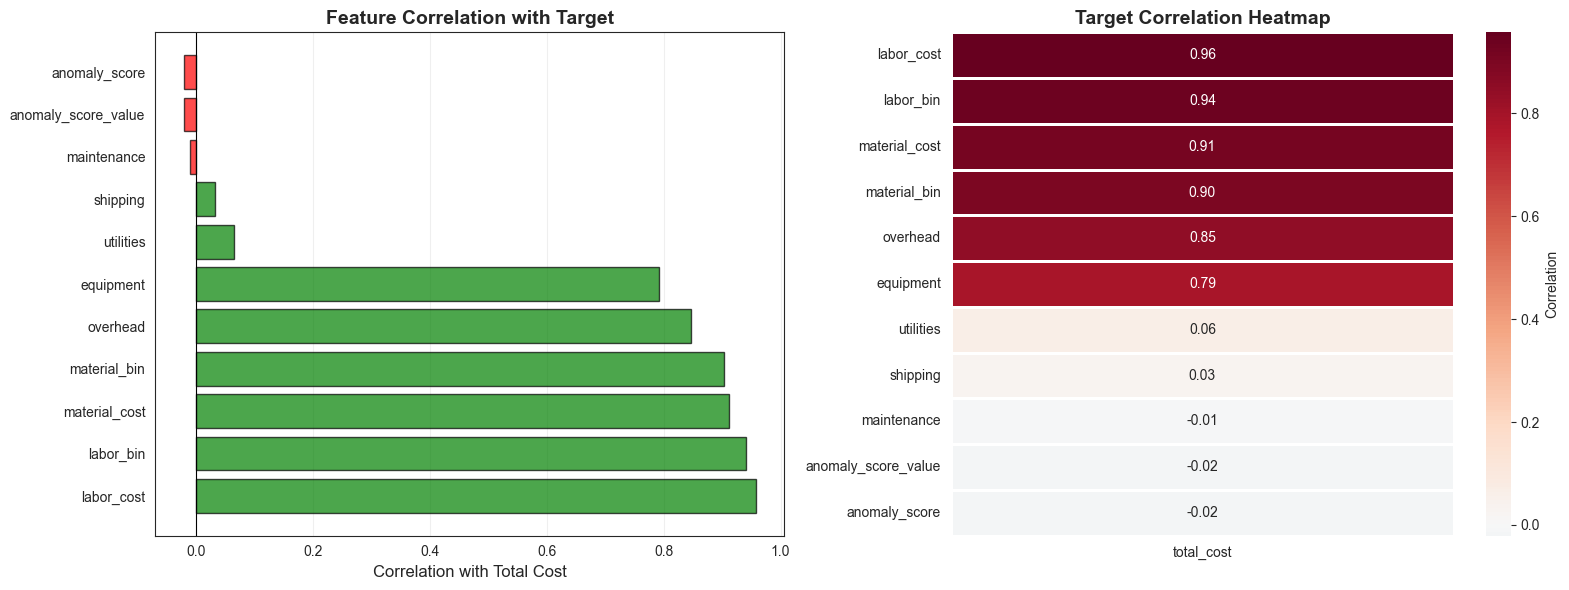

Correlation with Total Cost:
labor_cost             0.957636
labor_bin              0.941134
material_cost          0.912194
material_bin           0.903119
overhead               0.846225
equipment              0.792176
utilities              0.064698
shipping               0.032148
maintenance           -0.009754
anomaly_score_value   -0.020596
anomaly_score         -0.021001


In [27]:
# Create a target variable (e.g., total cost)
df['total_cost'] = df[['labor_cost', 'material_cost', 'overhead',
                       'shipping', 'utilities', 'equipment', 'maintenance']].sum(axis=1)

# Calculate correlation with target
target_corr = df.corr()['total_cost'].drop('total_cost').sort_values(ascending=False)

# Visualize as horizontal bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
ax1.barh(target_corr.index, target_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Correlation with Total Cost', fontsize=12)
ax1.set_title('Feature Correlation with Target', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(alpha=0.3, axis='x')

# Heatmap view
target_corr_df = target_corr.to_frame()
sns.heatmap(
    target_corr_df,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=2,
    cbar_kws={'label': 'Correlation'},
    ax=ax2
)
ax2.set_title('Target Correlation Heatmap', fontsize=14, fontweight='bold')
ax2.set_xlabel('')

plt.tight_layout()
plt.show()

print("Correlation with Total Cost:")
print("=" * 50)
print(target_corr.to_string())

# Custom Annotated Heatmap

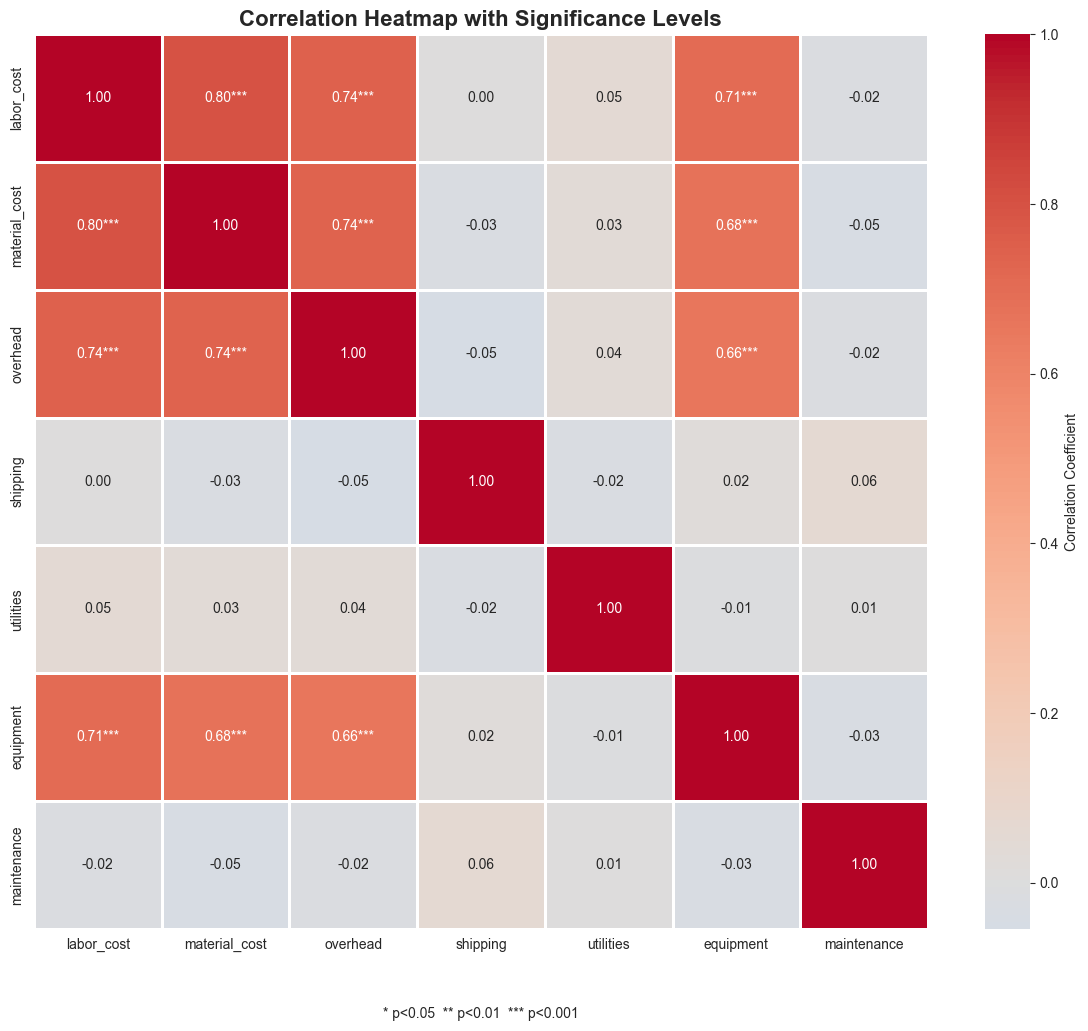

In [28]:

# Create custom annotations with stars for significance
def create_annotated_heatmap(corr_matrix, pvalues, alpha=0.05):
    """
    Create heatmap with significance stars
    * p < 0.05
    ** p < 0.01
    *** p < 0.001
    """
    # Create annotations
    annotations = []
    for i in range(len(corr_matrix)):
        row = []
        for j in range(len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            p_val = pvalues.iloc[i, j]

            # Format correlation value
            text = f"{corr_val:.2f}"

            # Add significance stars
            if i != j:  # Not diagonal
                if p_val < 0.001:
                    text += "***"
                elif p_val < 0.01:
                    text += "**"
                elif p_val < 0.05:
                    text += "*"

            row.append(text)
        annotations.append(row)

    return annotations

# Generate annotations
annot_array = create_annotated_heatmap(correlation_matrix, pvalues)

# Plot
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    correlation_matrix,
    annot=annot_array,
    fmt='',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=2,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap with Significance Levels', fontsize=16, fontweight='bold')
plt.text(0.5, -0.1, '* p<0.05  ** p<0.01  *** p<0.001',
         transform=ax.transAxes, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Comparing Groups with Heatmap

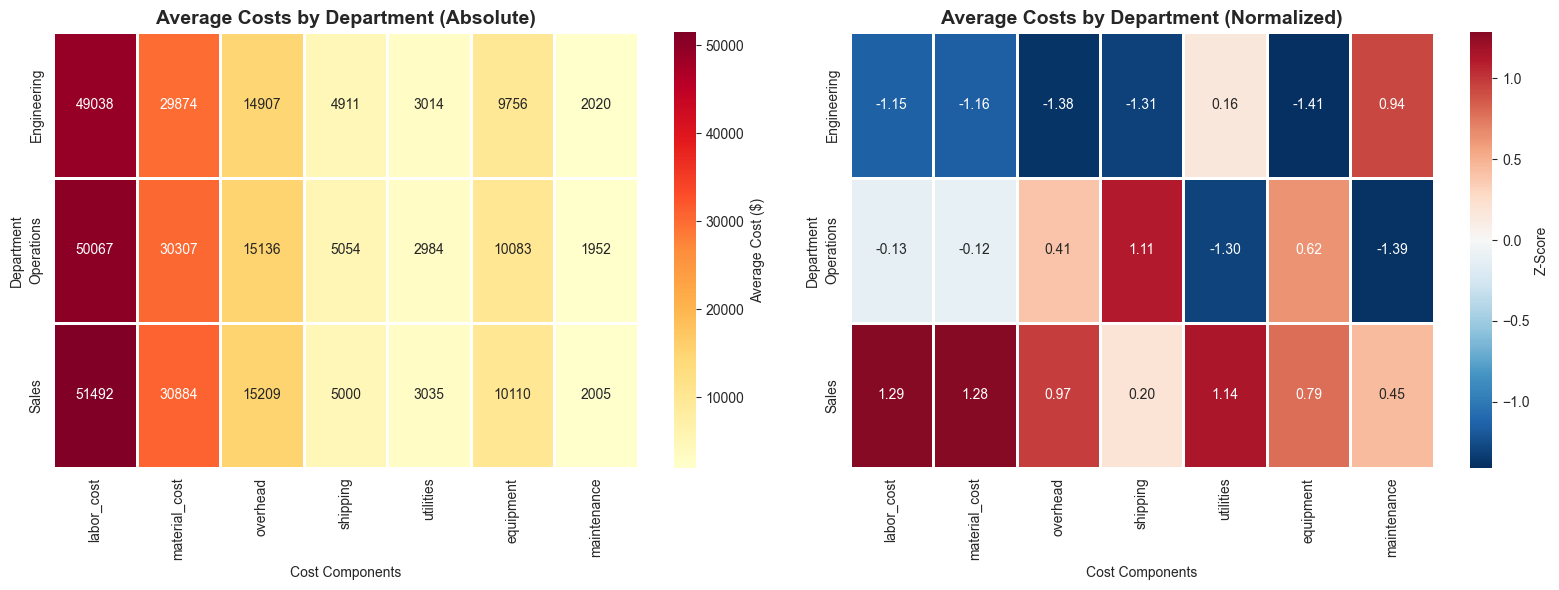

In [29]:
# Add department categories
df['department'] = np.random.choice(['Engineering', 'Operations', 'Sales'], len(df))

# Calculate mean costs by department
dept_means = df.groupby('department')[['labor_cost', 'material_cost', 'overhead',
                                       'shipping', 'utilities', 'equipment',
                                       'maintenance']].mean()

# Normalize for better comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dept_means_scaled = pd.DataFrame(
    scaler.fit_transform(dept_means),
    columns=dept_means.columns,
    index=dept_means.index
)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Absolute values
sns.heatmap(
    dept_means,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    linewidths=2,
    ax=ax1,
    cbar_kws={'label': 'Average Cost ($)'}
)
ax1.set_title('Average Costs by Department (Absolute)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cost Components')
ax1.set_ylabel('Department')

# Normalized (z-scores)
sns.heatmap(
    dept_means_scaled,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=2,
    ax=ax2,
    cbar_kws={'label': 'Z-Score'}
)
ax2.set_title('Average Costs by Department (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cost Components')
ax2.set_ylabel('Department')

plt.tight_layout()
plt.show()

# When to Use Heatmaps
✅ Use Heatmaps for:

## Correlation Analysis

Understanding relationships between variables
Finding multicollinearity in regression
Feature selection for machine learning


## Time Series Patterns

Seasonal patterns (month vs year)
Day-of-week effects
Hourly patterns


## Missing Data Visualization

Identifying missing data patterns
Understanding data quality issues


## Comparing Groups

Department/category comparisons
Before/after analysis
Benchmark comparisons


## Anomaly Detection

Visualizing anomaly scores across dimensions
Identifying unusual patterns



❌ Not Ideal for:

Small matrices (< 3x3) - use scatter plots
Very large matrices (> 50x50) - annotations become unreadable
Exact value reading - better to show tables
Non-rectangular data